# Navigation

---

In this notebook, we will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment and Agent

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# Import the agent. See agent.py in detail.
from agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. It's time to train!

Now it's time to train our own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Recall that in our task, in order to solve the environment, our agent must end up with an average score of +13 over 100 consecutive episodes. So we need to introduce a list to accommodate the average score.

Finally, we plot the raw data for scores and also the average score for a good visualization of the progress.

In [5]:
# Define the deep Q-learning function as in tutorials

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, train_mode=True, checkpointpt='checkpoint.pth'):
    """ Deep Q-Learning.
    
    Params
    ----------
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train_mode (bool): whether train mode is on (True) or off (False)
    -------
    """
    # monitor performance
    avg_scores = []   # a list to contain avg scores over 100 consecutive episodes
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # a temporary list of last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset the env (see the above paragraph)
        state = env_info.vector_observations[0] # extract the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)   # select an action using eps
            env_info = env.step(action)[brain_name]   # send the action to env
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]   # get the reward
            done = env_info.local_done[0]  # see if episode ended
            agent.step(state, action, reward, next_state, done) # input S, A, R, S' for the agent to learn
            state = next_state # S <- S'
            score += reward # accumulate the score
            if done:
                break
        scores_window.append(score)   # save most recent score
        scores.append(score)     # save most recent score in the whole history
        avg_score = np.mean(scores_window) # calculate an average (=moving average)
        avg_scores.append(avg_score) # save the moving average 
        eps = max(eps_end, eps_decay*eps) # multiply epsilon by decay rate
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode,  avg_score), end="")
        if i_episode % 100 == 0: # average per 100 episodes
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score))
        if np.mean(scores_window)>= 13.0: # our task!
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, avg_score))
            # save the trained model before closing
            if train_mode:
                torch.save(agent.qnetwork_local.state_dict(), checkpointpt)
            break
    return scores, avg_scores 

In [7]:
# define the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double_mode=False, dueling_mode=False)
# start the training!
scores, avg_scores = dqn(n_episodes=500, eps_decay=0.986, eps_end=0.02, checkpointpt='checkpoint.pth')

Episode 100	Average Score: 2.58
Episode 200	Average Score: 8.65
Episode 300	Average Score: 11.98
Episode 365	Average Score: 13.00
Environment solved in 265 episodes!	Average Score: 13.00


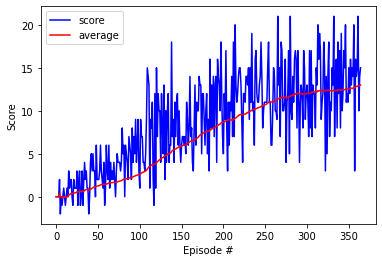

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, c='b', label='score')
plt.plot(np.arange(len(avg_scores)), avg_scores, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

Raw score fluctuates but as you can see, we observe the gradual improvement of scores.

### 4. Let us test the model!
Now that we built the good model to satisfy the task, let us test its performance. Initializing the agent and loading the chekpoint file, we test the model in a small number of episodes below.

Episode 1	Average Score: 14.00
Episode 2	Average Score: 16.00
Episode 3	Average Score: 15.00
Episode 4	Average Score: 14.00
Episode 5	Average Score: 15.00
Episode 6	Average Score: 15.83
Episode 7	Average Score: 16.00
Episode 8	Average Score: 16.00
Episode 9	Average Score: 15.44
Episode 10	Average Score: 15.30


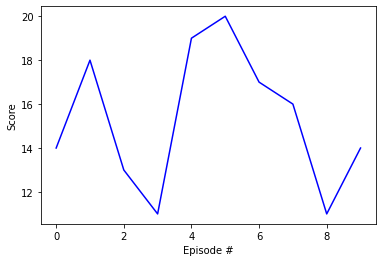

In [9]:
# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

# load the saved model
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

num_episodes = 10
scores = []
for i_episode in range(1, num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # turn off train mode
    state = env_info.vector_observations[0] # get the current state
    score = 0
    while True:
        action = agent.act(state, eps=0) # the agent chooses the action
        env_info = env.step(action)[brain_name] # send the action to the environment
        next_state = env_info.vector_observations[0] # get the next state
        reward = env_info.rewards[0] # get the reward
        done = env_info.local_done[0] # see if the episode ended
        score += reward # update the score
        state = next_state # S <- S'
        if done:
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, c='b', label='raw score')
#plt.plot(np.arange(len(avg_scores)), avg_scores, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show() 

The overall evaluation is that the trained model led to nice scores.

### 5. Experimenting model buildings
Below let us build a collection of models by tweaking a different set of hyperparameters.

#### 5.1 turn on double_mode and dueling_mode

Episode 100	Average Score: -0.03
Episode 200	Average Score: 3.551
Episode 300	Average Score: 7.59
Episode 400	Average Score: 11.43
Episode 457	Average Score: 13.09
Environment solved in 357 episodes!	Average Score: 13.09


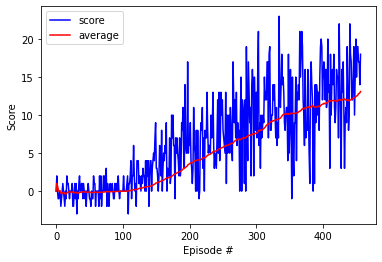

In [11]:
# define the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double_mode=True, dueling_mode=True)
# start the training!
scores, avg_scores = dqn(n_episodes=500, eps_decay=0.986, eps_end=0.02, checkpointpt='checkpoint2.pth')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, c='b', label='score')
plt.plot(np.arange(len(avg_scores)), avg_scores, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

 You can try other models along the above example code!

In [12]:
# close the environment
env.close()